In [128]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import subprocess
import os
%matplotlib notebook

In [129]:
# constant for all examples
dt     = 50         # ms
v_max  = 16         # ft/sec
a_max  = 64         # ft/sec/sec
j_max  = a_max * 10 # ft/sec/sec/sec

In [152]:
# drive forward down field
waypoints = [
    {"x": 0, "y": 0, "degrees": 0},
    {"x": 5, "y": 4.5, "degrees": 90},
    {"x": 12.5, "y": 9.5, "degrees": 0},
    {"x": 15.5, "y": 9.5, "degrees": 0},
    {"x": 22.5, "y": 4, "degrees": -90},
    {"x": 22.5, "y": -10, "degrees": -90},
    {"x": 15, "y": -17.5, "degrees": -180},
    {"x": 10, "y": -17.5, "degrees": -180},
    {"x": 5, "y": -10, "degrees": 90},
    {"x": 0, "y": 0, "degrees": 0},
]

In [153]:
motion_input = {"pathfinder":{"dt":dt, "v_max": v_max, "a_max": a_max, "j_max": j_max, "waypoints": waypoints}}
process = subprocess.run("MOTION_OPTS=-Djava.library.path=../build/install/motion/lib ../build/install/motion/bin/motion '{}'".format(json.dumps(motion_input)), shell=True)
df = pd.read_csv("trajectory.csv", index_col="time")

<IPython.core.display.Javascript object>


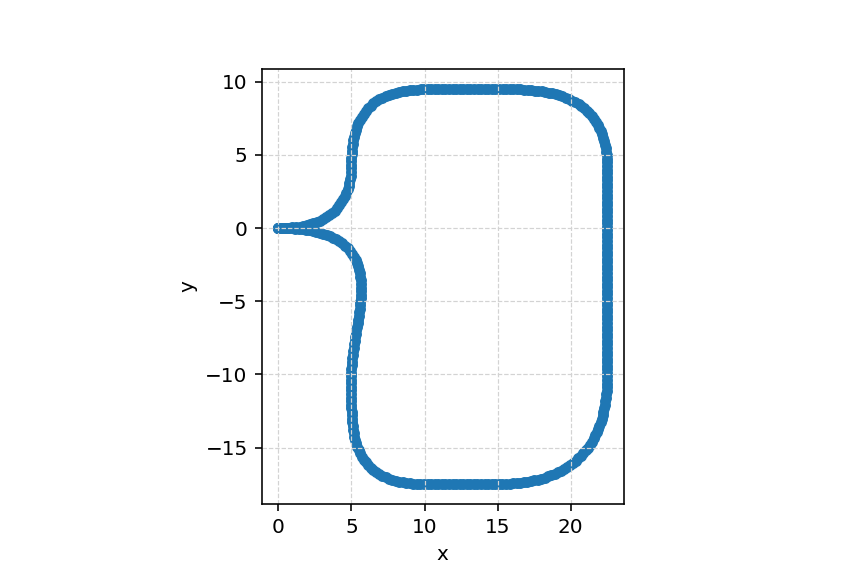

In [154]:
ax = df.plot.scatter('x', 'y')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)
ax.set_aspect('equal')

In [133]:
df['heading_deg'] = df['heading_rad'].apply(math.degrees)
df['velocity_normalized'] = df['velocity'] / df['velocity'].max()
df['forward'] = df['heading_rad'].apply(math.cos) * df['velocity_normalized']
df['strafe'] = -df['heading_rad'].apply(math.sin) * df['velocity_normalized']
df[['heading_deg', 'velocity', 'velocity_normalized', 'forward', 'strafe']]

,heading_deg,velocity,velocity_normalized,forward,strafe
time,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,-0.000000
50.0,0.058436,1.600000,0.100000,0.100000,-0.000102
100.0,0.296302,4.800000,0.300000,0.299996,-0.001551
150.0,0.783722,8.000000,0.500000,0.499953,-0.006839
200.0,1.545334,11.200000,0.700000,0.699745,-0.018878
250.0,2.621491,14.400000,0.900000,0.899058,-0.041164
300.0,3.997413,16.000001,1.000000,0.997567,-0.069711
350.0,5.572626,16.000001,1.000000,0.995274,-0.097107
400.0,7.292466,16.000001,1.000000,0.991911,-0.126934
